In [1]:
%load_ext autoreload
%autoreload 2

# Deposit time lag analysis

In [2]:
# standard path wrangling to be able to import project config and sources
import os
import sys
root = os.path.dirname(os.getcwd())
sys.path.append(root)
print('Project root: {}'.format(root))

Project root: /Users/dasha/code/jcdl_2019


Imports:

In [3]:
# Built-in

# Installed
import pandas as pd
import seaborn as sns

# Custom
from src.utils.config_loader import ConfigLoader
from src.data.dataset_loader import DatasetLoader
from src.visualization.analysis_q1 import (
    deposit_time_lag,
    overall_dtl,
    dtl_per_country,
    dtl_per_country_year,
    uk_compliance_per_year,
    repository_dtl,
    repository_compliance,
    repository_dtl_detailed,
    subject_dtl,
    ref_panel_compliance,
    dtl_average_change,
)

Load config:

In [4]:
cfg = ConfigLoader.load_config()

Other setup:

In [5]:
sns.set()
palette = sns.color_palette('muted')
sns.set_palette(palette)

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('max_colwidth', 800)

Paths:

In [6]:
dataset_path = os.path.join(root, 'data', 'dataset.csv')
output_dir = os.path.join(root, cfg['paths']['output_dir'], 'figures/')

## Data

Load data:

In [7]:
df = DatasetLoader().load_dataset(dataset_path)

808984it [01:30, 8922.26it/s] 


In [8]:
df.head(3).transpose()

,0,1,2
core_country_code,[it],[uk],[ch]
core_deposited_date,[2016-09-09 00:00:00],[2017-09-26 00:00:00],[2018-02-07 00:00:00]
core_doi,[10.1001/jama.2014.9143],[None],[10.1001/jamaoto.2016.2981]
core_id_document,[80269649],[96648431],[154258392]
core_id_repository,[1078],[6],[345]
core_metadata_added,[2017-04-13 00:00:00],[2017-10-19 00:00:00],[2018-04-10 00:00:00]
core_oai,[oai:arpi.unipi.it:11568/803546],[oai:arro.anglia.ac.uk:702274],[oai:www.zora.uzh.ch:146921]
core_published_date,[2014],[2017-08-08],[2017]
core_repository_name,[Archivio della Ricerca - Università di Pisa],[Anglia Ruskin Research Online],[ZORA]
cr_accepted,NaT,NaT,NaT


## Overall deposit time lag

In [9]:
f = lambda x: {'difference_days': sorted(x['core_deposited_date'])[0] - x['cr_published']}
df = df.join(df.apply(f, axis=1, result_type='expand'))

In [10]:
df['difference_days'].describe()

count                      808984
mean     180 days 16:43:16.892892
std      361 days 14:08:07.426329
min          -4824 days +00:00:00
25%               2 days 00:00:00
50%              78 days 00:00:00
75%             285 days 00:00:00
max            2241 days 00:00:00
Name: difference_days, dtype: object

Overall DTL


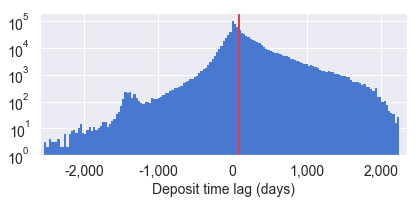


DTL per year


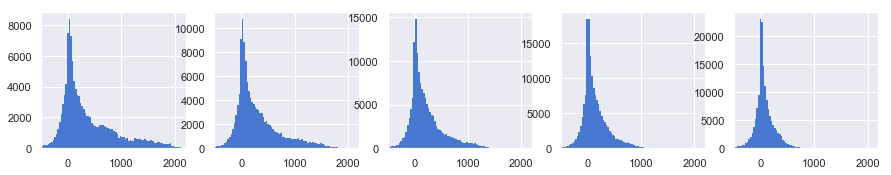

In [11]:
fig_path = os.path.join(output_dir, 'deposit_time_lag_all.pdf')
overall_dtl(df, fig_path)

## DTL per country

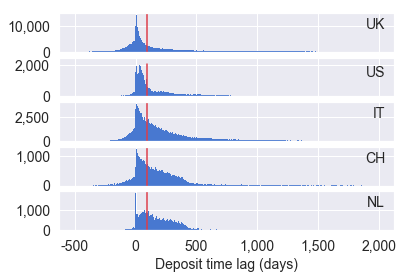

In [12]:
countries = ['uk', 'us', 'it', 'ch', 'nl']
fig_path = os.path.join(output_dir, 'deposit_time_lag_country.pdf')
dtl_per_country(df, countries, output_path=fig_path)

## DTL per country and year

Average change in deposit time lag between 2013 and 2017 across all countries

In [13]:
dtl_average_change(df)

Min&max decrease in average DTL between 2013 & 2017: (-241.8, 1232.9977448584123)
Average decrease in DTL between 2013 and 2017: 471.89
Average DTL in 2017: 134.51
Average DTL in 2018: 81.63


### No limit on DTL


Deposit time lag per country/year
Data for uk: [387.0, 355.0, 222.0, 101.0, 32.0, -4.0]
Data for us: [309.0, 235.0, 192.0, 150.0, 98.0, 80.0]
Data for it: [706.0, 442.0, 267.0, 177.0, 107.0, 48.0]
Data for ch: [265.0, 166.0, 132.0, 123.0, 54.0, -1.0]
Data for nl: [300.0, 231.0, 259.0, 208.0, 140.0, 102.0]


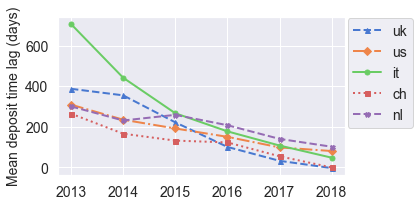

In [14]:
countries = ['uk', 'us', 'it', 'ch', 'nl']
fig_path = os.path.join(output_dir, 'deposit_time_lag_agg_no_limit.pdf')
dtl_per_country_year(df, countries, fig_path, limit_dtl_years=None)

### 2 year limit on DTL


Deposit time lag per country/year
Data for uk: [160.0, 194.0, 148.0, 81.0]
Data for us: [180.0, 156.0, 164.0, 144.0]
Data for it: [400.0, 280.0, 212.0, 162.0]
Data for ch: [198.0, 112.0, 95.0, 110.0]
Data for nl: [210.0, 195.0, 238.0, 206.0]


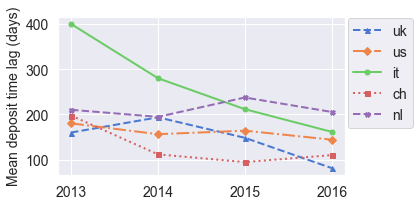

In [15]:
countries = ['uk', 'us', 'it', 'ch', 'nl']
fig_path = os.path.join(output_dir, 'deposit_time_lag_agg_limit_2y.pdf')
dtl_per_country_year(df, countries, fig_path, limit_dtl_years=2)

### 1 year limit on DTL


Deposit time lag per country/year
Data for uk: [82.0, 104.0, 84.0, 40.0, 14.0]
Data for us: [112.0, 90.0, 86.0, 102.0, 74.0]
Data for it: [244.0, 176.0, 145.0, 119.0, 86.0]
Data for ch: [149.0, 76.0, 56.0, 65.0, 31.0]
Data for nl: [179.0, 167.0, 182.0, 168.0, 128.0]


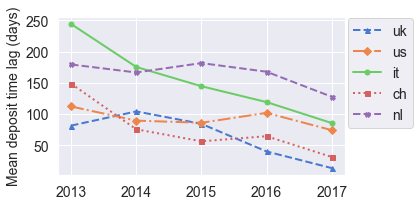

In [16]:
countries = ['uk', 'us', 'it', 'ch', 'nl']
fig_path = os.path.join(output_dir, 'deposit_time_lag_agg_limit_1y.pdf')
dtl_per_country_year(df, countries, fig_path, limit_dtl_years=1)

## UK compliance per year

 50%|█████     | 3/6 [00:00<00:00, 21.84it/s]

UK DTL statistics:

count                      215979
mean     160 days 22:35:15.105635
std      343 days 17:50:38.323689
min          -3905 days +00:00:00
25%             -7 days +00:00:00
50%              36 days 00:00:00
75%             213 days 00:00:00
max            2208 days 00:00:00
Name: difference_days, dtype: object

Calculating compliance per year


100%|██████████| 6/6 [00:00<00:00, 20.24it/s]



Compliance per year:


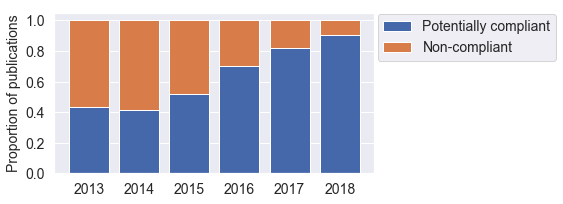

In [17]:
fig_path = os.path.join(output_dir, 'uk_compliance_year.pdf')
uk_compliance_per_year(df, fig_path)

## Repository statistics

2013 -- range (-148.17714676276873, 1833.943661971831), std: 377.360192428098
2014 -- range (-307.33257661748013, 1464.0), std: 269.87170652676
2015 -- range (-421.4704570791527, 1209.641791044776), std: 191.57288094178435
2016 -- range (-405.9053708439898, 838.6108108108108), std: 143.46467033986974
2017 -- range (-502.9282945736434, 488.4140127388535), std: 107.54328495234103


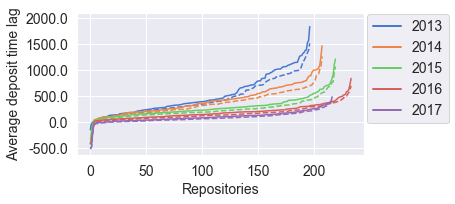

In [18]:
fig_path = os.path.join(output_dir, 'deposit_time_lag_repo.pdf')
repository_dtl(df, fig_path)

2013 -- range (-112.31536519036518, 1675.34375), std: 369.6498563069833
2014 -- range (-301.4789644012945, 1171.0252100840337), std: 331.0195128902753
2015 -- range (-528.7611336032388, 731.9233716475096), std: 208.617921556431
2016 -- range (-499.60538116591925, 352.20588235294116), std: 135.52458732945732
2017 -- range (-634.1269841269841, 306.46078431372547), std: 174.43384787192588


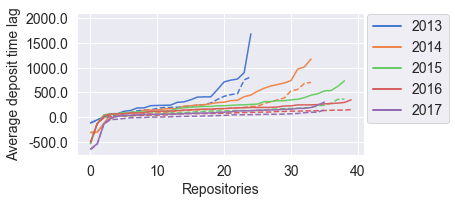

In [19]:
df_filtered = df[['Physics and Astronomy' in row for row in df.subjects]]
fig_path = os.path.join(output_dir, 'deposit_time_lag_physics.pdf')
repository_dtl(df_filtered, fig_path)

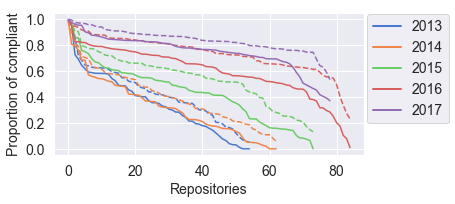

In [20]:
fig_path = os.path.join(output_dir, 'compliance_repo_year.pdf')
repository_compliance(df, fig_path)

### Repository DTL detailed

In [21]:
dtl_df = repository_dtl_detailed(df, 2017)
dtl_df.head(10)

100%|██████████| 808984/808984 [01:08<00:00, 11838.58it/s]      


,name,average DTL,#publications
id,,,
144,arXiv.org e-Print Archive,-176.75,20559
200,Caltech Authors,-9.90,1524
124,University of East Anglia digital repository,-5.68,1432
3110,Queensland University of Technology - ePrints Archive,4.21,1516
310,Queensland University of Technology ePrints Archive,4.95,1534
33,Durham Research Online,9.04,1548
131,University of Strathclyde Institutional Repository,13.91,1373
17,Central Archive at the University of Reading,19.70,1152
140,White Rose Research Online,22.06,6024


In [22]:
dtl_df.tail(10)

,name,average DTL,#publications
id,,,
555,Helsingin yliopiston digitaalinen arkisto,134.14,1332
1080,Archivio della Ricerca - Università di Roma Tor vergata,135.61,1084
1659,Jagiellonian Univeristy Repository,138.79,1178
1099,Archivio istituzionale della ricerca - Università di Genova,141.06,1747
547,PubliCatt,148.00,1264
988,Utrecht University Repository,154.37,4286
1090,Archivio istituzionale della ricerca - Politecnico di Milano,154.61,2510
405,edoc,181.13,1250
1893,PolyU Institutional Repository,218.48,2198


## Subject DTL

2017: 100%|██████████| 162567/162567 [00:12<00:00, 12891.68it/s]


Removing Decision Sciences (less than 100 values)

Statistics for 2013
OrderedDict([('nobs', 28),
             ('minmax', (26.93467790487658, 559.0349344978166)),
             ('mean', 406.2157678260665),
             ('variance', 11981.404559819237),
             ('skewness', -2.2021604827127934),
             ('kurtosis', 5.060504814590589)])
Std: 107.48719576820025

Statistics for 2017
OrderedDict([('nobs', 28),
             ('minmax', (-181.71634741537653, 112.99632352941177)),
             ('mean', 67.38854246121949),
             ('variance', 3414.954385826623),
             ('skewness', -3.169462822479335),
             ('kurtosis', 10.35702162953815)])
Std: 57.384594876935026

DTL per subject


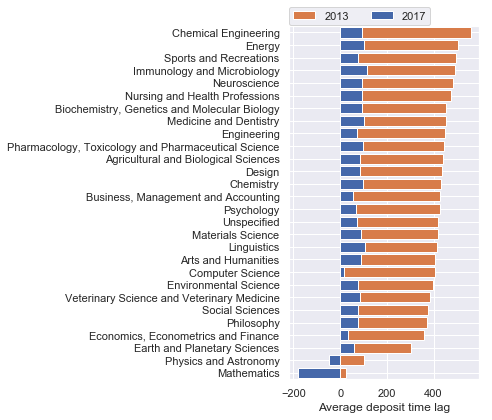

In [23]:
fig_path = os.path.join(output_dir, 'deposit_time_lag_subject.pdf')
subject_dtl(df, [2013, 2017], fig_path)

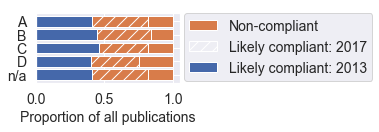

In [24]:
fig_path = os.path.join(output_dir, 'compliance_panel.pdf')
ref_panel_compliance(df, [2013, 2017], fig_path)